<a href="https://colab.research.google.com/github/Atharsha-P/python/blob/main/Logistic_Regression_Lung_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = pd.read_csv(r"/lung_cancer_survey (1).csv")


In [14]:
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [15]:
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [16]:
data.shape

(309, 16)

In [17]:
data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [18]:
data.nunique()

,0
GENDER,2
AGE,39
SMOKING,2
YELLOW_FINGERS,2
ANXIETY,2
PEER_PRESSURE,2
CHRONIC DISEASE,2
FATIGUE,2
ALLERGY,2
WHEEZING,2


In [19]:
data.isna().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [21]:
data.GENDER.replace(to_replace=["F","M"], value=[0,1], inplace=True)
data.replace(to_replace=[2,1], value=[0,1], inplace=True)
data.LUNG_CANCER.replace(to_replace=["NO","YES"], value=[0,1], inplace=True)

<ipython-input-21-3f479e2eecf1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.GENDER.replace(to_replace=["F","M"], value=[0,1], inplace=True)
<ipython-input-21-3f479e2eecf1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.GENDER.replace(to_replace=["F","M"], value=[0,1], inplace=True)


In [22]:
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,0,0,1,1,0,1,0,0,0,0,0,0,1
1,1,74,0,1,1,1,0,0,0,1,1,1,0,0,0,1
2,0,59,1,1,1,0,1,0,1,0,1,0,0,1,0,0
3,1,63,0,0,0,1,1,1,1,1,0,1,1,0,0,0
4,0,63,1,0,1,1,1,1,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,0,0,0,1,1,0,0,0,0,1,1
305,1,70,0,1,1,1,1,0,0,0,0,0,0,1,0,1
306,1,58,0,1,1,1,1,1,0,0,0,0,1,1,0,1
307,1,67,0,1,0,1,1,0,0,1,0,0,0,1,0,1


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [24]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
GENDER,309.0,0.524272,0.500221,0.0,0.0,1.0,1.0,1.0
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,0.436893,0.496806,0.0,0.0,0.0,1.0,1.0
YELLOW_FINGERS,309.0,0.430421,0.495938,0.0,0.0,0.0,1.0,1.0
ANXIETY,309.0,0.501618,0.500808,0.0,0.0,1.0,1.0,1.0
PEER_PRESSURE,309.0,0.498382,0.500808,0.0,0.0,0.0,1.0,1.0
CHRONIC DISEASE,309.0,0.495146,0.500787,0.0,0.0,0.0,1.0,1.0
FATIGUE,309.0,0.326861,0.469827,0.0,0.0,0.0,1.0,1.0
ALLERGY,309.0,0.443366,0.497588,0.0,0.0,0.0,1.0,1.0
WHEEZING,309.0,0.443366,0.497588,0.0,0.0,0.0,1.0,1.0


Text(0.5, 1.0, 'Target Distribution')

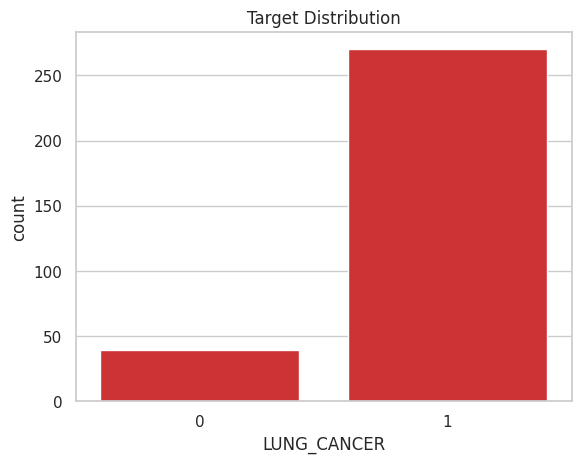

In [25]:
sns.set(style="whitegrid")
sns.set_palette("Set1")
sns.countplot(x="LUNG_CANCER", data=data)
plt.title("Target Distribution")

Text(0.5, 1.0, 'Target Distribution By Gender')

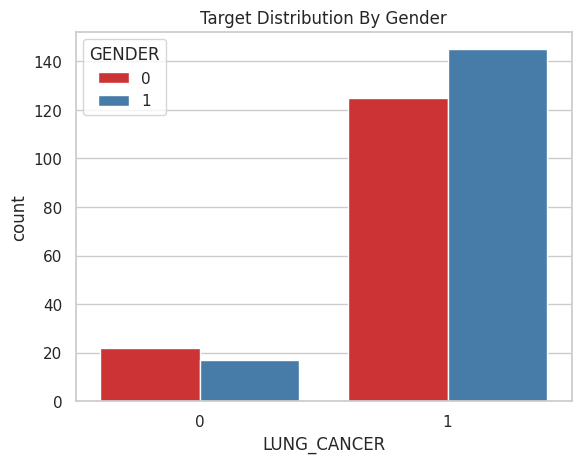

In [26]:
sns.countplot(x="LUNG_CANCER", hue="GENDER", data=data)
plt.title("Target Distribution By Gender")

In [27]:
from sklearn.model_selection import train_test_split
X=data.drop("LUNG_CANCER", axis=1)
Y=data["LUNG_CANCER"]

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.27, random_state=0)
(X_train.shape, Y_train.shape), (X_test.shape, Y_test.shape)

(((225, 15), (225,)), ((84, 15), (84,)))

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg = logreg.fit(X_train_scaler, Y_train)

In [31]:
logreg_predictions = logreg.predict(X_test_scaler)
logreg_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, logreg_predictions)

0.9047619047619048

In [33]:
from sklearn.metrics import recall_score as rs
rs(Y_test, logreg_predictions)

0.9859154929577465

In [34]:
from sklearn.metrics import precision_score as ps
ps(Y_test, logreg_predictions)

0.9090909090909091

In [35]:
from sklearn.metrics import classification_report as cr
print(cr(Y_test, logreg_predictions, target_names=["Benign","Malignant"]))

              precision    recall  f1-score   support

      Benign       0.86      0.46      0.60        13
   Malignant       0.91      0.99      0.95        71

    accuracy                           0.90        84
   macro avg       0.88      0.72      0.77        84
weighted avg       0.90      0.90      0.89        84



Text(46.25, 0.5, 'Actual Value')

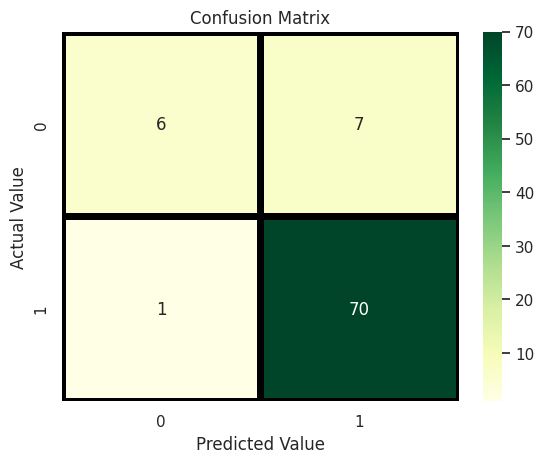

In [36]:
from sklearn.metrics import confusion_matrix as cm
c_m=cm(Y_test, logreg_predictions, labels=[0,1])

sns.heatmap(c_m, annot=True, fmt='.2g', cmap="YlGn", linecolor="black", linewidths=5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")